In [452]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import matplotlib.pyplot as plt
import seaborn as sns

import os
import geopandas as gpd


In [453]:
df = pd.read_csv("stolenvehicles.csv")
gdf = gpd.read_file("lris-lcdb-v41-version-trace-mainland-new-zealand-SHP")

In [454]:

df.head()

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location
0,Silver,Trailer,BST2021D,2021,Trailer,5/11/2021,Waitemata
1,Silver,Trailer,OUTBACK BOATS FT470,2021,Boat Trailer,13/12/2021,Eastern
2,Silver,Trailer,ASD JETSKI,2021,Boat Trailer,13/02/2022,Auckland City
3,Silver,Trailer,MSC 7X4,2021,Trailer,13/11/2021,Central
4,Silver,Trailer,D-MAX 8X5,2018,Trailer,10/01/2022,Waitemata


In [455]:
df['DateStolen'] = pd.to_datetime(df['DateStolen'])


In [456]:
df=df.sort_values(by='DateStolen', ascending=False)


Text(0.5, 1.0, 'Stolen car colors')

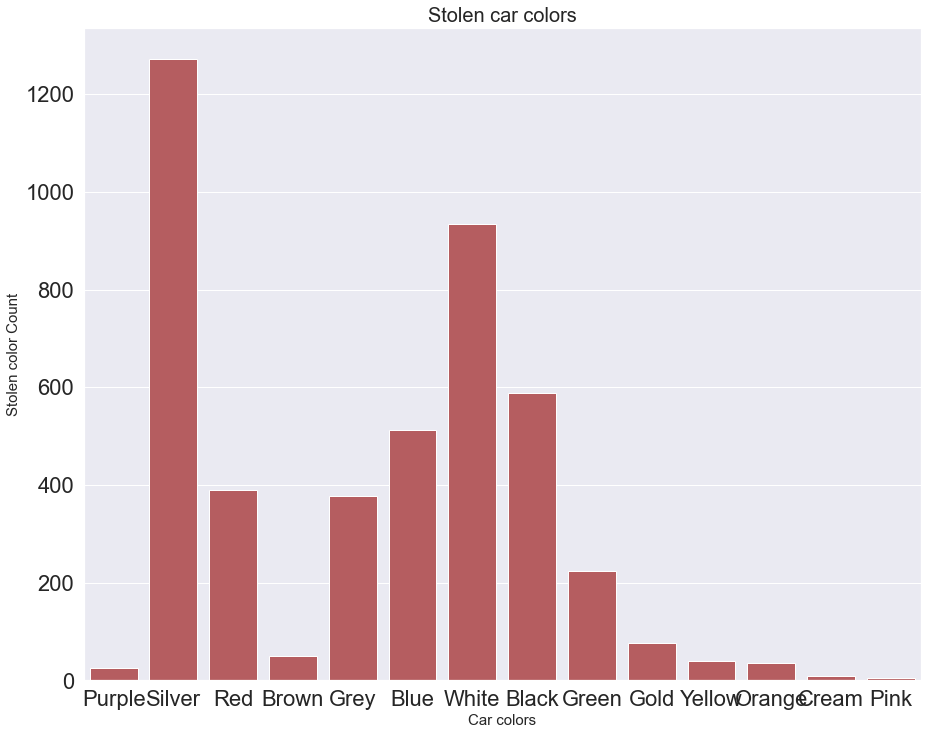

In [457]:
ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1)
sns.countplot(x='Color', data=df, color="r")
plt.ylabel('Stolen color Count', fontsize=15);
plt.xlabel('Car colors', fontsize=15);
plt.title('Stolen car colors', fontsize=20)

Text(0.5, 1.0, 'CAR THEFT AREAS')

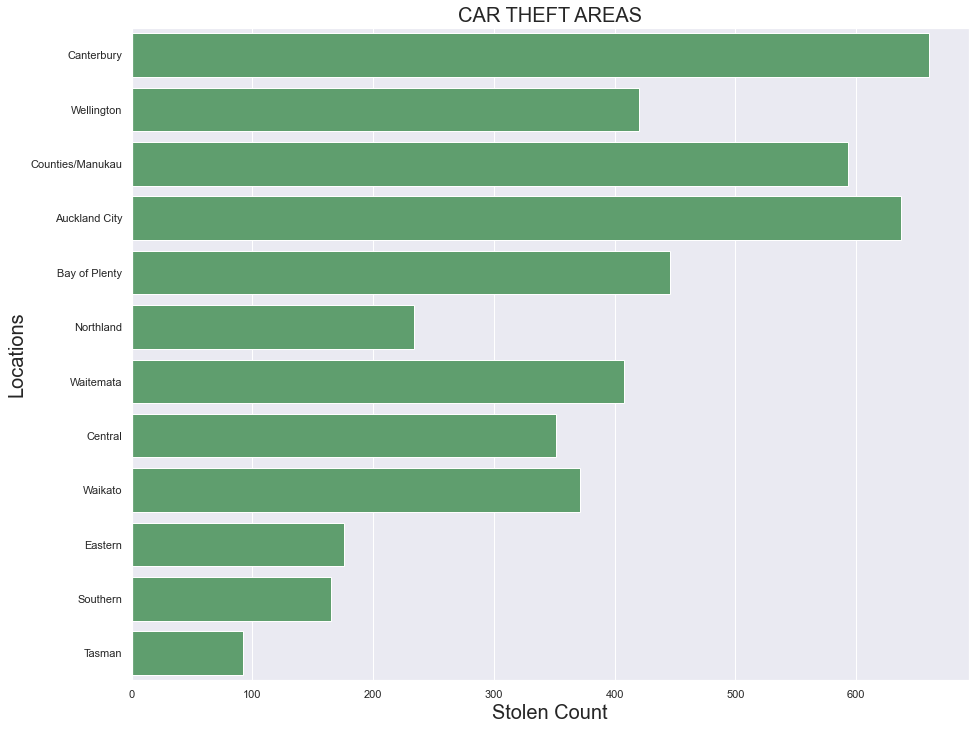

In [458]:
ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=2)
sns.countplot(y='Location', data=df, color="g")
plt.xlabel('Stolen Count', fontsize=20);
plt.ylabel('Locations', fontsize=20);
plt.title('CAR THEFT AREAS', fontsize=20)

In [459]:
"""
Canterbury
Northland
Auckland city - Auckland
Counties/Manukau - Auckland
Bay of Plenty
Waitemata - Auckland
Waikato
Southern - Southland
Eastern - Hawke's Bay
Tasman
Wellington
Central - Wellington
"""

df_copy = df.copy(deep=True)
df_copy["Location"] = df_copy["Location"].replace(["Auckland City"], "Auckland, New Zealand")
df_copy["Location"] = df_copy["Location"].replace(["Counties/Manukau"], "Auckland, New Zealand")
df_copy["Location"] = df_copy["Location"].replace(["Waitemata"], "Auckland, New Zealand")
df_copy["Location"] = df_copy["Location"].replace(["Southern"], "Southland, New Zealand")
df_copy["Location"] = df_copy["Location"].replace(["Eastern"], "Hawke's Bay, New Zealand")
df_copy["Location"] = df_copy["Location"].replace(["Central", "Canterbury"], "Canterbury, New Zealand")
df_copy["Location"] = df_copy["Location"].replace(["Tasman"], "Tasman, New Zealand")

df["Location"] = df["Location"].replace(["Auckland City"], "Auckland")
df["Location"] = df["Location"].replace(["Counties/Manukau"], "Auckland")
df["Location"] = df["Location"].replace(["Waitemata"], "Auckland")
df["Location"] = df["Location"].replace(["Southern"], "Southland")
df["Location"] = df["Location"].replace(["Eastern"], "Hawke's Bay")
df["Location"] = df["Location"].replace(["Central", "Canterbury"], "Canterbury")
df["Location"] = df["Location"].replace(["Tasman"], "Tasman")


df_copy.Location



df1 = pd.DataFrame()
df1["Location"] = df_copy.Location.unique()
df1

df["Location"].unique()



array(['Canterbury', 'Wellington', 'Auckland', 'Bay of Plenty',
       'Northland', 'Waikato', "Hawke's Bay", 'Southland', 'Tasman'],
      dtype=object)

In [460]:
location_list = gpd.tools.geocode(df1.Location)
location_list
df

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location
3942,Purple,Mercedes-Benz,CLA180,2013,Saloon,2022-12-03,Canterbury
2779,Silver,Nissan,NAVARA,2014,Utility,2022-12-03,Wellington
3967,Red,Nissan,NAVARA,2021,Utility,2022-12-03,Auckland
2645,Purple,Mazda,DEMIO,2005,Stationwagon,2022-12-03,Auckland
4245,Brown,Toyota,COROLLA,1996,Hatchback,2022-12-03,Bay of Plenty
...,...,...,...,...,...,...,...
3109,White,Toyota,CROWN,2005,Saloon,2021-01-11,Bay of Plenty
1865,Silver,Ford,RANGER,2007,Utility,2021-01-11,Bay of Plenty
2413,White,Mazda,AXELA,2005,Saloon,2021-01-11,Auckland
762,Green,Honda,CRV,2001,Light Van,2021-01-11,Wellington


In [461]:
#fig, ax = plt.subplots()
#gdf.to_crs("EPSG:4326").plot(ax=ax, color="white", edgecolor="black")
#location_list.plot(ax=ax, color="red")



In [462]:

locations = ["Gisborne", "Taranaki", "Manawatū-Whanganui", "West Coast", "Otago", "Marlborough", "North Island", "South Island", "New Zealand"]

df_economies_2 = pd.read_csv("Economy_Regional_Gross_Domestic_Product_by_region_and_industry_20002021.csv")
df_economies_2 = df_economies_2[df_economies_2["Industry"]=="Gross Domestic Product"]
df_economies_2 = df_economies_2[df_economies_2["Year ended March"]==2021]
df_economies_2 = df_economies_2.drop("Year ended March", axis=1).drop("Value Unit", axis = 1).drop("Region Code", axis=1).drop("Null Reason", axis=1).drop("Metadata 1", axis=1).drop("Value Label", axis=1).drop("Measure", axis=1).drop("Industry", axis =1)

print(locations)
for region in locations:
    df_economies_2 = df_economies_2[df_economies_2["Region"].str.contains(region)==False]



df


['Gisborne', 'Taranaki', 'Manawatū-Whanganui', 'West Coast', 'Otago', 'Marlborough', 'North Island', 'South Island', 'New Zealand']


,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location
3942,Purple,Mercedes-Benz,CLA180,2013,Saloon,2022-12-03,Canterbury
2779,Silver,Nissan,NAVARA,2014,Utility,2022-12-03,Wellington
3967,Red,Nissan,NAVARA,2021,Utility,2022-12-03,Auckland
2645,Purple,Mazda,DEMIO,2005,Stationwagon,2022-12-03,Auckland
4245,Brown,Toyota,COROLLA,1996,Hatchback,2022-12-03,Bay of Plenty
...,...,...,...,...,...,...,...
3109,White,Toyota,CROWN,2005,Saloon,2021-01-11,Bay of Plenty
1865,Silver,Ford,RANGER,2007,Utility,2021-01-11,Bay of Plenty
2413,White,Mazda,AXELA,2005,Saloon,2021-01-11,Auckland
762,Green,Honda,CRV,2001,Light Van,2021-01-11,Wellington


In [463]:
df_economies_2["Location"] = df_economies_2["Region"]
df_economies_2.drop("Region", axis = 1)

df = pd.merge(df, df_economies_2, on="Location")
df["Regional GDP"] = df["Value"]

df = df.drop("Value", axis=1)
df

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Region,Regional GDP
0,Purple,Mercedes-Benz,CLA180,2013,Saloon,2022-12-03,Canterbury,Canterbury,41138.0
1,Red,Toyota,HILUX,1993,Stationwagon,2022-12-03,Canterbury,Canterbury,41138.0
2,Silver,Trailer,HELMACK 8X4,2011,Trailer - Heavy,2022-12-02,Canterbury,Canterbury,41138.0
3,Silver,Ford,FALCON,2002,Saloon,2022-12-02,Canterbury,Canterbury,41138.0
4,Green,Mazda,RX-8,2003,Saloon,2022-12-02,Canterbury,Canterbury,41138.0
...,...,...,...,...,...,...,...,...,...
4456,Silver,Nissan,PRESAGE,2001,Stationwagon,2021-05-11,Southland,Southland,6730.0
4457,Gold,Ford,MONDEO,2001,Saloon,2021-03-12,Southland,Southland,6730.0
4458,Black,Isuzu,D-MAX,2016,Utility,2021-03-11,Southland,Southland,6730.0
4459,Black,Mitsubishi,OUTLANDER,2007,Stationwagon,2021-01-12,Southland,Southland,6730.0


In [464]:
df_years_schooling = pd.read_csv("years_of_education.csv")
df_years_schooling["Location"] = df_years_schooling["Region"]
df_years_schooling.drop("Region", axis = 1)

df = pd.merge(df, df_years_schooling, on="Location")

df

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Region_x,Regional GDP,Region_y,Percentage of school leavers retained to at least 17-years-old
0,Purple,Mercedes-Benz,CLA180,2013,Saloon,2022-12-03,Canterbury,Canterbury,41138.0,Canterbury,84.4
1,Red,Toyota,HILUX,1993,Stationwagon,2022-12-03,Canterbury,Canterbury,41138.0,Canterbury,84.4
2,Silver,Trailer,HELMACK 8X4,2011,Trailer - Heavy,2022-12-02,Canterbury,Canterbury,41138.0,Canterbury,84.4
3,Silver,Ford,FALCON,2002,Saloon,2022-12-02,Canterbury,Canterbury,41138.0,Canterbury,84.4
4,Green,Mazda,RX-8,2003,Saloon,2022-12-02,Canterbury,Canterbury,41138.0,Canterbury,84.4
...,...,...,...,...,...,...,...,...,...,...,...
4456,Silver,Nissan,PRESAGE,2001,Stationwagon,2021-05-11,Southland,Southland,6730.0,Southland,78.8
4457,Gold,Ford,MONDEO,2001,Saloon,2021-03-12,Southland,Southland,6730.0,Southland,78.8
4458,Black,Isuzu,D-MAX,2016,Utility,2021-03-11,Southland,Southland,6730.0,Southland,78.8
4459,Black,Mitsubishi,OUTLANDER,2007,Stationwagon,2021-01-12,Southland,Southland,6730.0,Southland,78.8


Text(0.5, 0, 'Theft count')

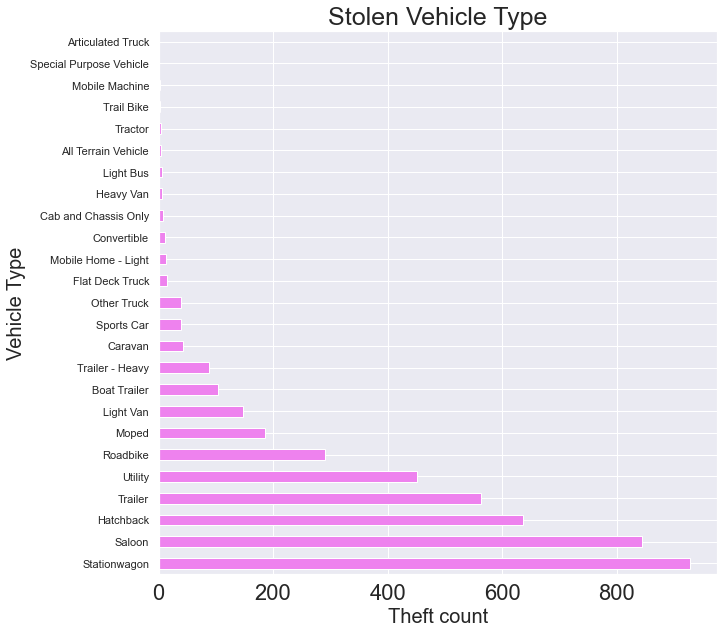

In [465]:
df['VehicleType'].value_counts().plot(kind='barh',figsize=(10, 10), color='Violet')
plt.yticks(fontsize=11)
plt.title("Stolen Vehicle Type", fontsize= 25)
plt.ylabel("Vehicle Type",fontsize= 20)
plt.xlabel("Theft count",fontsize= 20)

<AxesSubplot:ylabel='VehicleModel'>

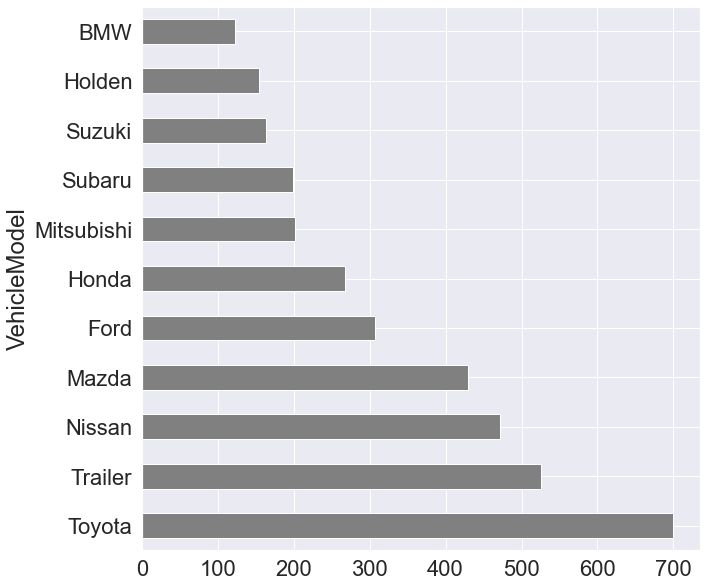

In [466]:
df.value_counts('VehicleModel').head(11).plot(kind='barh',figsize=(10, 10), color='grey')


In [467]:
n = 5000
df_car_census = pd.read_csv("Motor_Vehicle_Register.csv", skiprows=lambda i: i % n != 0)


<AxesSubplot:ylabel='MAKE'>

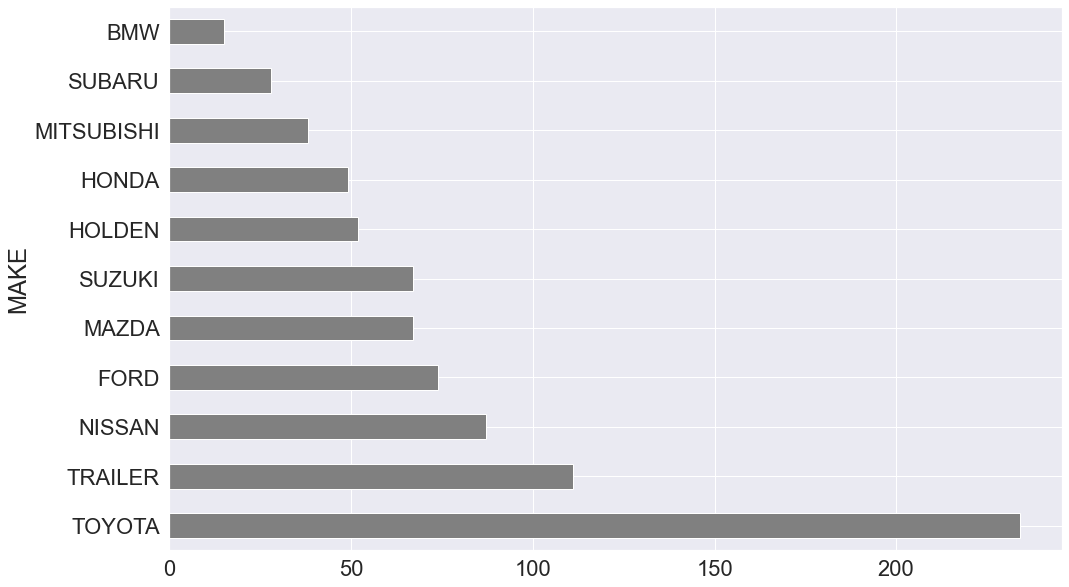

In [468]:
df2 = df_car_census[(df_car_census["MAKE"] == "BMW") | (df_car_census["MAKE"] == "HOLDEN") | (df_car_census["MAKE"] == "SUZUKI") | (df_car_census["MAKE"] == "SUBARU") | (df_car_census["MAKE"] == "MITSUBISHI") | (df_car_census["MAKE"] == "HONDA") | (df_car_census["MAKE"] == "FORD") | (df_car_census["MAKE"] == "MAZDA") | (df_car_census["MAKE"] == "NISSAN") | (df_car_census["MAKE"] == "TRAILER") | (df_car_census["MAKE"] == "TOYOTA")]
df2["MAKE"]
names_list = df2["MAKE"].unique()
names_list = np.sort(names_list)

df_stolen_census = df[(df["VehicleModel"] == "BMW") | (df["VehicleModel"] == "Holden") | (df["VehicleModel"] == "Suzuki") | (df["VehicleModel"] == "Subaru") | (df["VehicleModel"] == "Mitsubishi") | (df["VehicleModel"] == "Honda") | (df["VehicleModel"] == "Ford") | (df["VehicleModel"] == "Mazda") | (df["VehicleModel"] == "Nissan") | (df["VehicleModel"] == "Trailer") | (df["VehicleModel"] == "Toyota")]

names_list_stolen = df_stolen_census["VehicleModel"].unique()
names_list_stolen = np.sort(names_list_stolen)

df2.value_counts('MAKE').plot(kind='barh',figsize=(16, 10), color='grey')
# out of a sample size of 1000

In [469]:
def ratio_stolen(name):
    stolen_count = len(df[df["VehicleModel"] == name].value_counts().index.tolist())
    
    print(name, (stolen_count/3612))
    return (stolen_count/(3612))

n = 5583836/5000

def ratio_all(name):
    #print(name)
    df_temp = df2[df2["MAKE"]==name]
    all_count = len(df_temp)
    #all_count = len(df2[df2["MAKE"] == name].value_counts())
    #print(all_count)
    print(name, (all_count/(n)))
    return (all_count/(n))

In [470]:
dictionary = {}



In [471]:
for name in names_list_stolen:
    
    dictionary["stolen_"+name] = ratio_stolen(name)
    
    

BMW 0.033776301218161685
Ford 0.08471760797342193
Holden 0.04263565891472868
Honda 0.07308970099667775
Mazda 0.11794019933554817
Mitsubishi 0.05564784053156146
Nissan 0.13067552602436322
Subaru 0.054817275747508304
Suzuki 0.044296788482835
Toyota 0.19352159468438537
Trailer 0.143687707641196


In [472]:
for name in names_list:
    dictionary["all_"+name] = ratio_all(name)

BMW 0.013431626573559825
FORD 0.06626269109622847
HOLDEN 0.04656297212167406
HONDA 0.04387664680696209
MAZDA 0.05999459869523389
MITSUBISHI 0.03402678731968489
NISSAN 0.07790343412664699
SUBARU 0.02507236960397834
SUZUKI 0.05999459869523389
TOYOTA 0.20953337454753326
TRAILER 0.09939403664434271


In [473]:
dictionary

{'stolen_BMW': 0.033776301218161685,
 'stolen_Ford': 0.08471760797342193,
 'stolen_Holden': 0.04263565891472868,
 'stolen_Honda': 0.07308970099667775,
 'stolen_Mazda': 0.11794019933554817,
 'stolen_Mitsubishi': 0.05564784053156146,
 'stolen_Nissan': 0.13067552602436322,
 'stolen_Subaru': 0.054817275747508304,
 'stolen_Suzuki': 0.044296788482835,
 'stolen_Toyota': 0.19352159468438537,
 'stolen_Trailer': 0.143687707641196,
 'all_BMW': 0.013431626573559825,
 'all_FORD': 0.06626269109622847,
 'all_HOLDEN': 0.04656297212167406,
 'all_HONDA': 0.04387664680696209,
 'all_MAZDA': 0.05999459869523389,
 'all_MITSUBISHI': 0.03402678731968489,
 'all_NISSAN': 0.07790343412664699,
 'all_SUBARU': 0.02507236960397834,
 'all_SUZUKI': 0.05999459869523389,
 'all_TOYOTA': 0.20953337454753326,
 'all_TRAILER': 0.09939403664434271}

<AxesSubplot:ylabel='VehicleModel'>

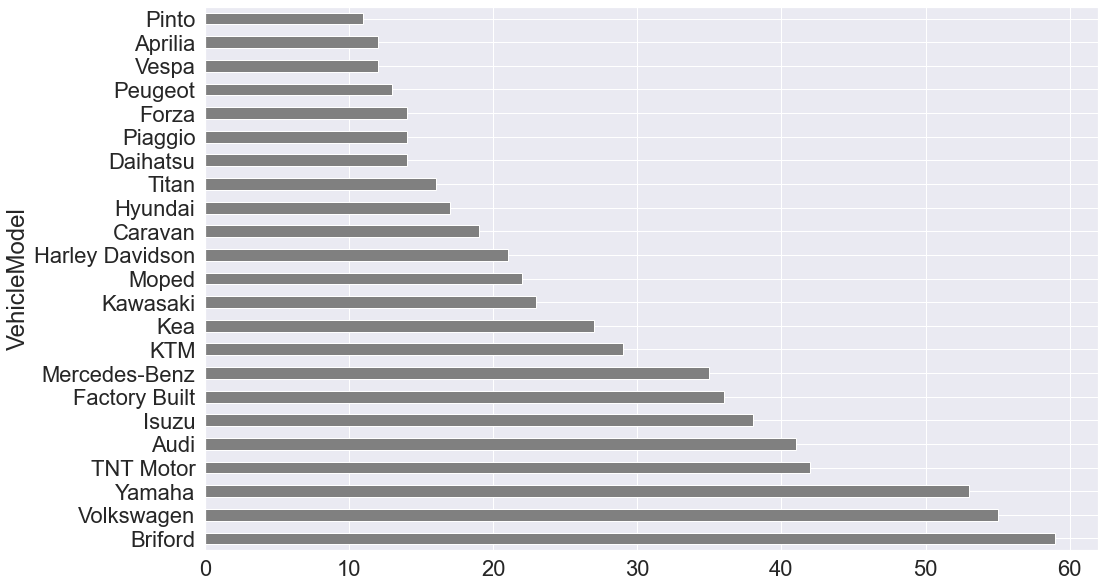

In [474]:
df.value_counts('VehicleModel').iloc[12:35].plot(kind='barh',figsize=(16, 10), color='grey')


In [475]:
df1 = df.loc[df["DateStolen"].between("2021-10-07","2021-12-31")]


In [476]:
df1['Date'] = df1['DateStolen'].dt.date
df1

<ipython-input-476-3a51b4cde91a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Region_x,Regional GDP,Region_y,Percentage of school leavers retained to at least 17-years-old,Date
627,Silver,Trailer,TUI,2017,Trailer,2021-12-31,Canterbury,Canterbury,41138.0,Canterbury,84.4,2021-12-31
628,Red,Mazda,RX-8,2006,Saloon,2021-12-31,Canterbury,Canterbury,41138.0,Canterbury,84.4,2021-12-31
629,Blue,Suzuki,GSX,2009,Roadbike,2021-12-31,Canterbury,Canterbury,41138.0,Canterbury,84.4,2021-12-31
630,White,Mitsubishi,L300,2002,Light Van,2021-12-31,Canterbury,Canterbury,41138.0,Canterbury,84.4,2021-12-31
631,Silver,Suzuki,SWIFT,2012,Hatchback,2021-12-31,Canterbury,Canterbury,41138.0,Canterbury,84.4,2021-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...
4435,Blue,Nissan,TERRANO,1999,Stationwagon,2021-10-16,Southland,Southland,6730.0,Southland,78.8,2021-10-16
4436,Red,Honda,ACCORD,1997,Saloon,2021-10-15,Southland,Southland,6730.0,Southland,78.8,2021-10-15
4437,Black,Victory,VEGAS,2013,Roadbike,2021-10-14,Southland,Southland,6730.0,Southland,78.8,2021-10-14
4438,Grey,Trailer,HOME BUILT,2001,Trailer,2021-10-14,Southland,Southland,6730.0,Southland,78.8,2021-10-14


Text(0.5, 1.0, '2021-CAR THEFT MONTHS')

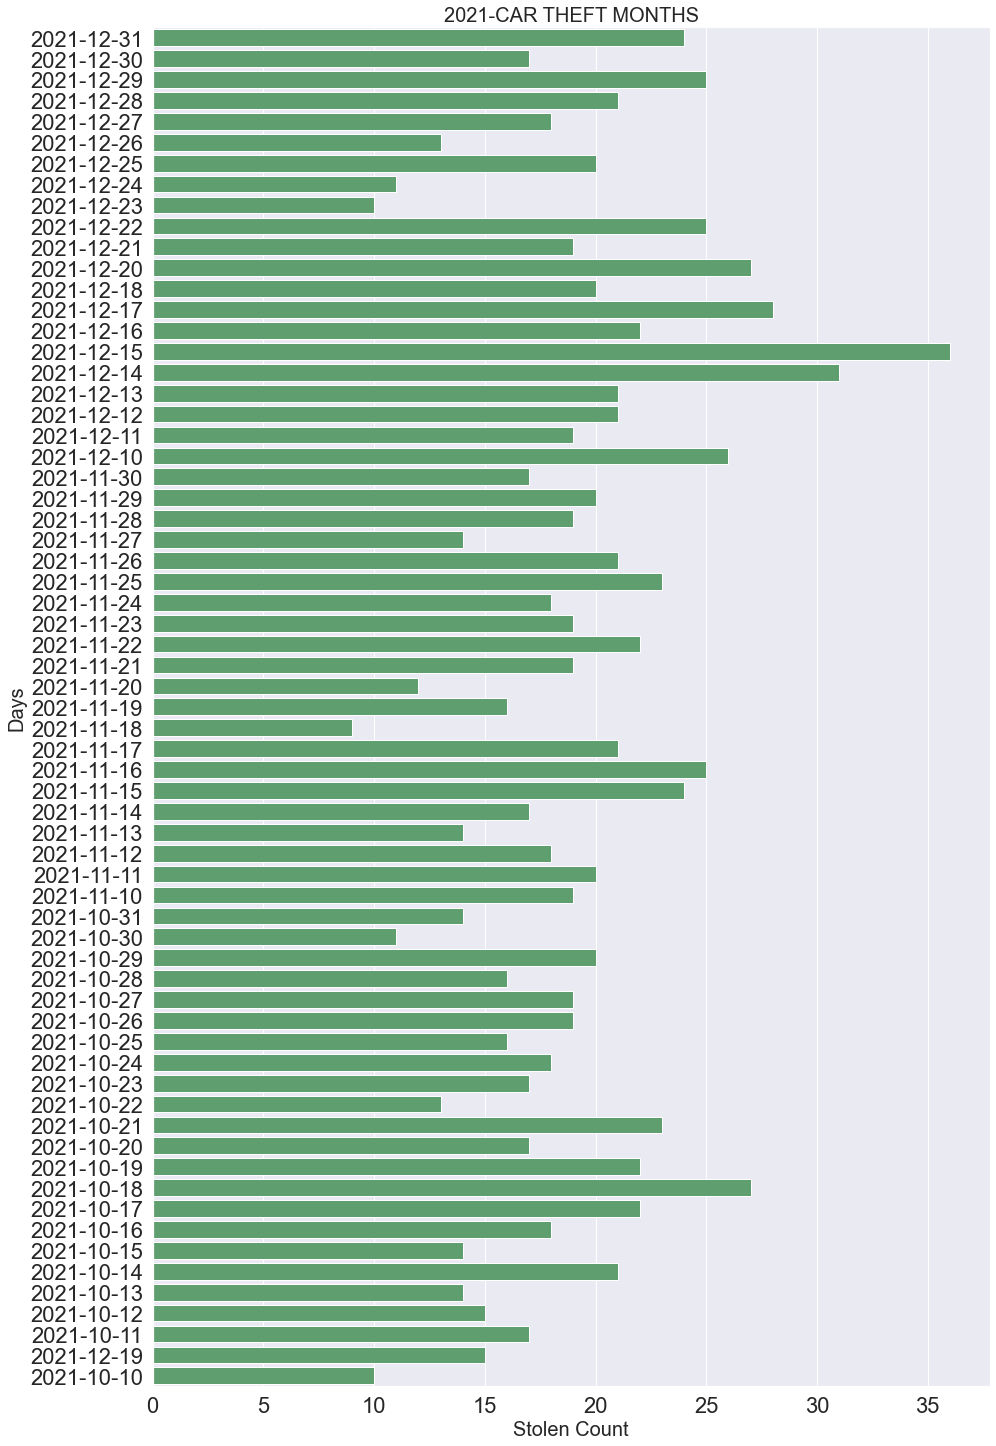

In [477]:
ax = plt.subplots(figsize=(15, 25))
sns.set(font_scale=2)
sns.countplot(y='Date', data=df1, color="g")
plt.xlabel('Stolen Count', fontsize=20);
plt.ylabel('Days', fontsize=20);
plt.title('2021-CAR THEFT MONTHS', fontsize=20)

In [478]:
df2 = df.loc[df["DateStolen"].between("2022-01-01", "2022-04-01")]


In [479]:
df2['Date'] = df2['DateStolen'].dt.date
print(df2)

       Color VehicleModel         VehicleDesc  ModelYear  \
179     Blue       Toyota             CALDINA       1996   
180    White       Toyota         LANDCRUISER       2018   
181   Silver      Trailer           ELITE 8X4       2015   
182    Black        Honda           FC50 BEAT       1983   
183      NaN      Hyundai                 NaN          0   
...      ...          ...                 ...        ...   
4387   Black       Nissan              SAFARI       1989   
4388    Blue      Trailer  BRIFORD 8X4 1000KG       2006   
4389   Black         Ford              FALCON       2007   
4390     NaN        Honda            CRF 100F          0   
4391  Silver       Subaru             IMPREZA       2016   

               VehicleType DateStolen    Location    Region_x  Regional GDP  \
179           Stationwagon 2022-04-01  Canterbury  Canterbury       41138.0   
180   Cab and Chassis Only 2022-04-01  Canterbury  Canterbury       41138.0   
181                Trailer 2022-04-01  Can

<ipython-input-479-2e4bceb97043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, '2022-CAR THEFT MONTHS')

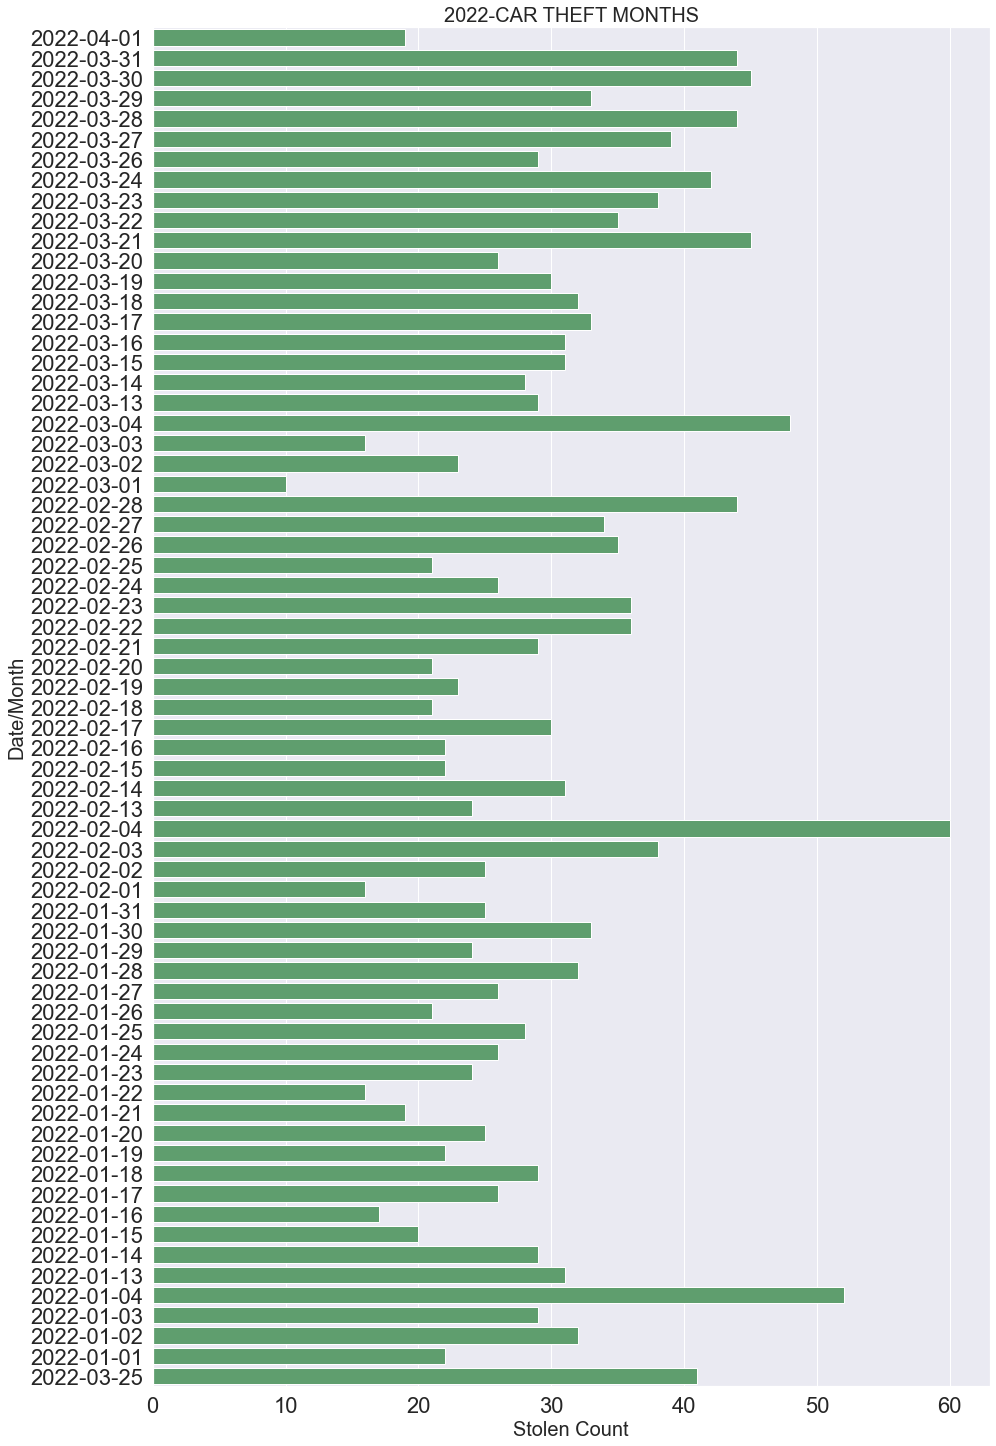

In [480]:
ax = plt.subplots(figsize=(15, 25))
sns.set(font_scale=2)
sns.countplot(y='Date', data=df2, color="g")
plt.xlabel('Stolen Count', fontsize=20);
plt.ylabel('Date/Month', fontsize=20);
plt.title('2022-CAR THEFT MONTHS', fontsize=20)